In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving PPT_Monthly.csv to PPT_Monthly.csv


In [ ]:
df=pd.read_csv('PPT_Monthly.csv')

In [ ]:
df.head()

,DATE,precipitation,Forecast
0,2005/1/1,15.398,NaN
1,2005/2/1,16.271,NaN
2,2005/3/1,31.718,NaN
3,2005/4/1,61.118,NaN
4,2005/5/1,64.986,NaN


In [ ]:
df.tail()

,DATE,precipitation,Forecast
175,2019/8/1,228.593,NaN
176,2019/9/1,259.176,NaN
177,2019/10/1,130.490,NaN
178,2019/11/1,26.309,NaN
179,2019/12/1,13.069,NaN


In [ ]:
## Cleaning up the data
df.columns=["DATE","precipitation","Forecast"]
df.head()

,DATE,precipitation,Forecast
0,2005/1/1,15.398,NaN
1,2005/2/1,16.271,NaN
2,2005/3/1,31.718,NaN
3,2005/4/1,61.118,NaN
4,2005/5/1,64.986,NaN


In [ ]:
df.tail()

,DATE,precipitation,Forecast
175,2019/8/1,228.593,NaN
176,2019/9/1,259.176,NaN
177,2019/10/1,130.490,NaN
178,2019/11/1,26.309,NaN
179,2019/12/1,13.069,NaN


In [ ]:
# Convert Month into Datetime
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,precipitation,Forecast
0,2005-01-01,15.398,NaN
1,2005-02-01,16.271,NaN
2,2005-03-01,31.718,NaN
3,2005-04-01,61.118,NaN
4,2005-05-01,64.986,NaN


In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head()

,precipitation,Forecast
DATE,,
2005-01-01,15.398,NaN
2005-02-01,16.271,NaN
2005-03-01,31.718,NaN
2005-04-01,61.118,NaN
2005-05-01,64.986,NaN


In [ ]:
df.describe()

,precipitation,Forecast
count,180.000000,0.0
mean,96.848800,NaN
std,92.695887,NaN
min,2.159000,NaN
25%,16.792500,NaN
50%,60.912500,NaN
75%,170.609750,NaN
max,347.563000,NaN


## Step 2: Visualize the Data

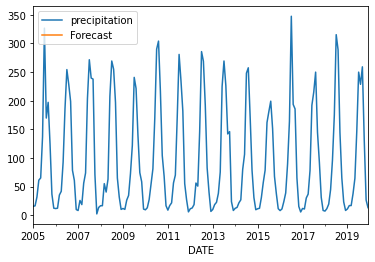

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['precipitation'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(precipitation):
    result=adfuller(precipitation)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['precipitation'])

ADF Test Statistic : -3.1454057756509
p-value : 0.023370394379018354
#Lags Used : 14
Number of Observations Used : 165
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
df['precipitation First Difference'] = df['precipitation'] - df['precipitation'].shift(1)

In [ ]:
df['precipitation'].shift(1)

DATE
2005-01-01        NaN
2005-02-01     15.398
2005-03-01     16.271
2005-04-01     31.718
2005-05-01     61.118
               ...   
2019-08-01    249.918
2019-09-01    228.593
2019-10-01    259.176
2019-11-01    130.490
2019-12-01     26.309
Name: precipitation, Length: 180, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['precipitation']-df['precipitation'].shift(12)

In [ ]:
df.head(14)

,precipitation,Forecast,precipitation First Difference,Seasonal First Difference
DATE,,,,
2005-01-01,15.398,NaN,NaN,NaN
2005-02-01,16.271,NaN,0.873,NaN
2005-03-01,31.718,NaN,15.447,NaN
2005-04-01,61.118,NaN,29.400,NaN
2005-05-01,64.986,NaN,3.868,NaN
2005-06-01,137.080,NaN,72.094,NaN
2005-07-01,326.762,NaN,189.682,NaN
2005-08-01,169.663,NaN,-157.099,NaN
2005-09-01,197.114,NaN,27.451,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.568938996483244
p-value : 2.8755376035824865e-11
#Lags Used : 11
Number of Observations Used : 156
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


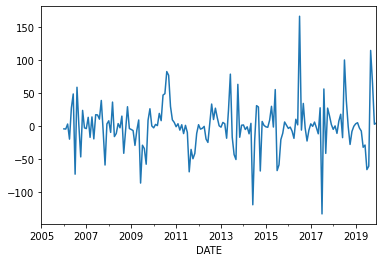

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

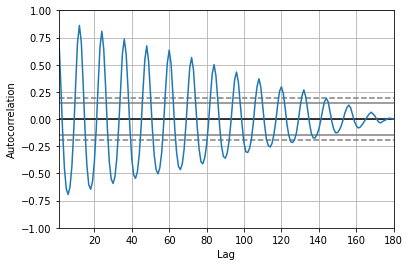

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['precipitation'])
plt.show()

### Final Autocorrelation and Partial Autocorrelation


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

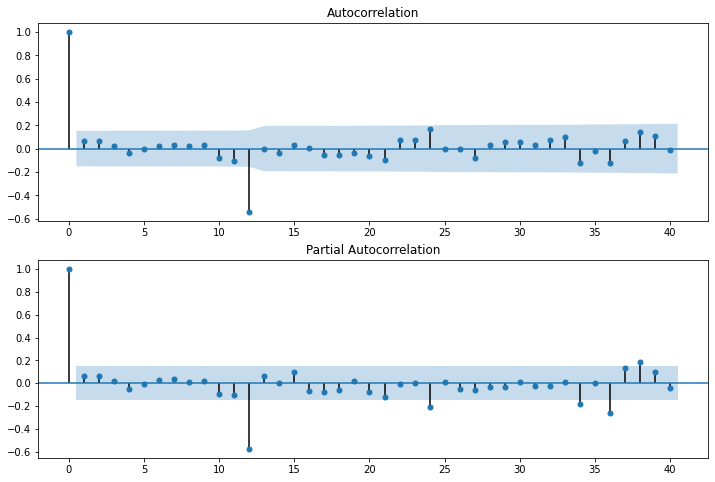

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['precipitation'],order=(3,1,4))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.precipitation   No. Observations:                  179
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -907.715
Method:                       css-mle   S.D. of innovations             37.203
Date:                Sat, 03 Dec 2022   AIC                           1833.429
Time:                        07:26:35   BIC                           1862.116
Sample:                    02-01-2005   HQIC                          1845.061
                         - 12-01-2019                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0507      0.053     -0.950      0.342      -0.155       0.054
ar.L1.D.precipitation     1.9695      0.194     10.164      0.000       1.590       2.349
ar.L2.D.precipitation    -1.4097      0.334     -4.216      0.000      -2.065      -0.754
ar.L3.D.precipitation     0.2388      0.193      1.235      0.217      -0.140       0.618
ma.L1.D.precipitation    -2.5798      0.197    -13.082      0.000      -2.966      -2.193
ma.L2.D.precipitation     2.1681      0.510      4.248      0.000       1.168       3.169
ma.L3.D.precipitation    -0.3950      0.479     -0.825      0.409      -1.333       0.543
ma.L4.D.precipitation    -0.1934      0.164     -1.179      0.238      -0.515       0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8696           -0.4995j            1.0028           -0.0830
AR.2            0.8696           +0.4995j            1.0028            0.0830
AR.3            4.1638           -0.0000j            4.1638           -0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.9375           -0.4155j            1.0255           -0.0664
MA.3            0.9375           +0.4155j            1.0255            0.0664
MA.4           -4.9179           -0.0000j            4.9179           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['precipitation'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


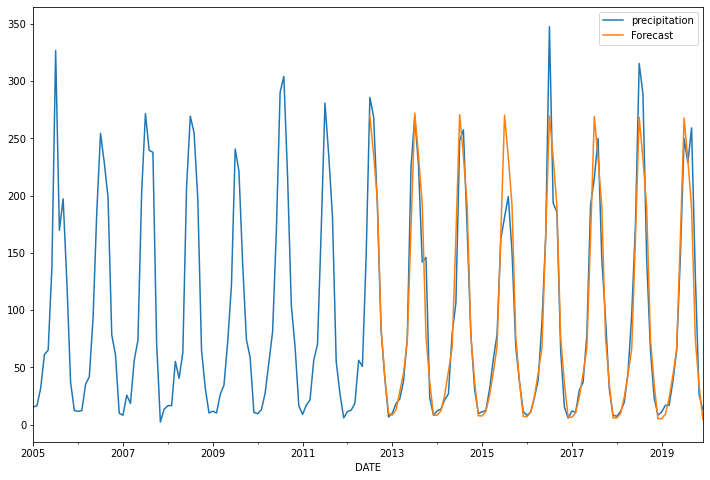

In [ ]:
df['Forecast']=results.predict(start=90,end=179,dynamic=True)
df[['precipitation','Forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,precipitation,Forecast,precipitation First Difference,Seasonal First Difference,forecast
2021-07-01,NaN,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN,NaN
2021-09-01,NaN,NaN,NaN,NaN,NaN
2021-10-01,NaN,NaN,NaN,NaN,NaN
2021-11-01,NaN,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

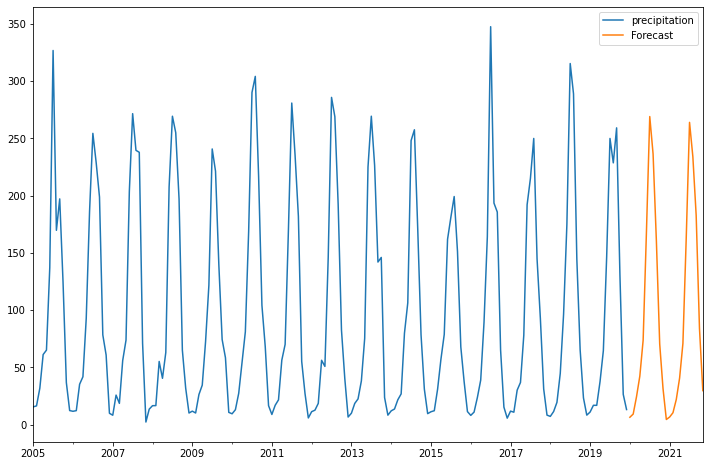

In [ ]:
future_df['Forecast'] = results.predict(start = 180, end = 300, dynamic= True)  
future_df[['precipitation', 'Forecast']].plot(figsize=(12,8)) 